#***Final Project - California Housing Prices Forecasting***

ISM 4543

Group Prime

##Introduction

Housing prices in California vary widely due to geographic, demographic, and economic factors. Understanding what drives these price differences is important for real-estate professionals, investors, and policymakers.

In this project, we use machine learning to predict median home values across California census districts. By analyzing features such as income, housing age, population, and proximity to the coast, we aim to identify key factors that influence property prices and build accurate predictive models.




## Business Problem

Although this dataset comes from 1990 census data, California remains one of the most dynamic and data-driven housing markets in the world.  
Our goal is not simply to predict house values, but to understand the structural drivers of housing affordability, which remain relevant today: income inequality, population density, and geographic constraints.

Stakeholders such as urban planners, municipal governments, and housing policy analysts still rely on long-term historical patterns to understand how demographic and geographic forces shape pricing regardless of the year the data was collected.  
Therefore, the model provides insights into fundamental economic relationships that still influence pricing today.

## Stakeholders & Value

- **Urban Planners:** Identify underserved low-income areas.  
- **Real Estate Developers:** Understand price drivers for development strategy.  
- **Investors:** Locate undervalued regions relative to income.  
- **Policymakers:** Measure affordability trends and plan interventions.  
- **Housing Nonprofits:** Identify areas at risk of inequality expansion.


## Data Quality Assessment

- Dataset has one missing column median imputed.  
- Contains capped values at $500,001 introduces censoring bias.  
- Lacks modern features (schools, crime, interest rates) limits predictive power.  
- Data collected from census block groups, ensuring structured sampling.  
- Still valid for understanding structural drivers, not modern market pricing.


## Metric Justification

For the regression models, we evaluated performance using MAE, RMSE, and R² because each metric captures a different and complementary aspect of prediction quality. MAE provides an interpretable measure of the average dollar error, making it useful for business stakeholders who need to understand typical pricing deviations. RMSE penalizes larger errors more heavily, helping us identify models that struggle with extreme values, an important consideration given the dataset’s price cap at $500,000. R² shows how much variance in housing prices is explained by the model, offering a high-level assessment of overall fit. For the classification models, we used Accuracy, Macro F1, Precision, Recall, and Confusion Matrices. Because some price categories (especially “Luxury”) are underrepresented, Macro F1 ensures that each class is weighted equally, giving a fairer comparison than accuracy alone. Precision and recall help clarify whether the model is over, or under predicting specific tiers. Together, these metrics provide a balanced, business relevant evaluation framework that aligns with our goal of creating interpretable, decision supportive models.

##Data Loading and Cleaning

In [ ]:
#Dataset Loading
import pandas as pd

# auto-download California housing dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The dataset is loaded automatically from a public repository to ensure the notebook runs without manual uploads or API keys. This keeps the project fully reproducible.

In [ ]:
#Data Structure

#Basic info
print("\nDataset Info:")
df.info()

#Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())

#Shape
print("\nDataset Shape:")
df.shape



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

Summary Statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



Dataset Shape:


(20640, 10)

In [ ]:
#Cheking for missing values

print("Missing values per column:\n")
df.isna().sum()


Missing values per column:



,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
#Handiling vissing values
#Median imputation

median_bedrooms = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(median_bedrooms, inplace=True)

# Verification
df.isna().sum()


/tmp/ipython-input-3584701433.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["total_bedrooms"].fillna(median_bedrooms, inplace=True)


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


###Explanation:


In this first step, we loaded the California housing dataset and explored its structure to understand the available features, data types, and overall shape. We examined summary statistics and checked for missing values to ensure data quality. Our analysis showed that only the total_bedrooms column contained missing entries, representing approximately 1% of the data. Since removing rows could lead to unnecessary data loss, we handled the missing values using median imputation, a common and reliable approach for numerical variables. With this, the dataset is now clean and ready for exploratory data analysis.

##Exploratory Data Analysis

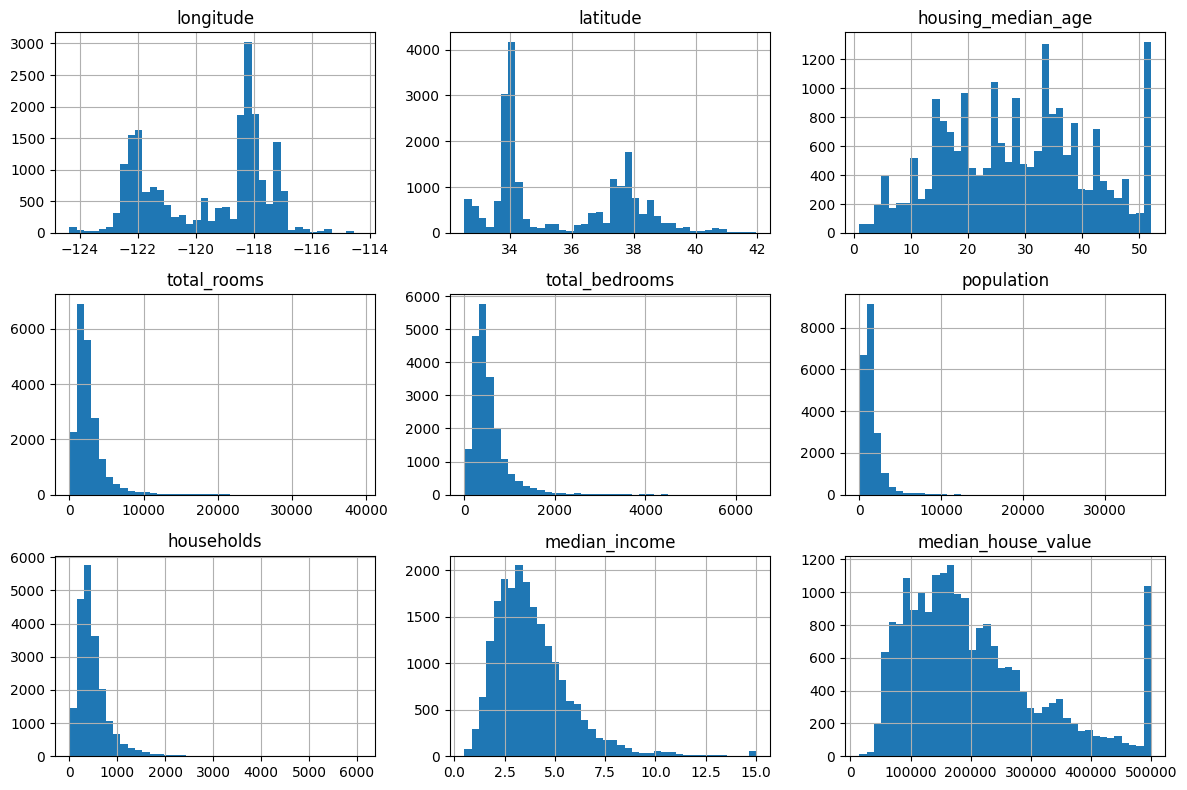

In [ ]:
#Histogram for all numerical features

import matplotlib.pyplot as plt

df.hist(bins=40, figsize=(12,8))
plt.tight_layout()
plt.show()


The histograms show that many features, including total rooms, total bedrooms, population, and households, are highly right-skewed, meaning most neighborhoods have moderate values while a few have very large counts. median_income is slightly skewed right, with most households earning between $20k–$60k. median house value also shows right skewness and a visible cap at $500,000, indicating capped values in the dataset. Overall, the distributions suggest variability across districts and the presence of outliers, which will be important considerations during preprocessing and modeling.

In [ ]:
#Correlation Matrix

corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049457
population,-0.024650
longitude,-0.045967
latitude,-0.144160


The correlation results show that median income has the strongest positive relationship with median house value (0.69), meaning areas with higher household incomes tend to have higher housing prices. Other numerical features such as total rooms and housing median age have weak positive correlations with home value, while population, longitude, and latitude show very weak or slightly negative relationships. Overall, income stands out as the most important predictor among the numeric features, suggesting that socioeconomic factors play a major role in determining housing prices in California.

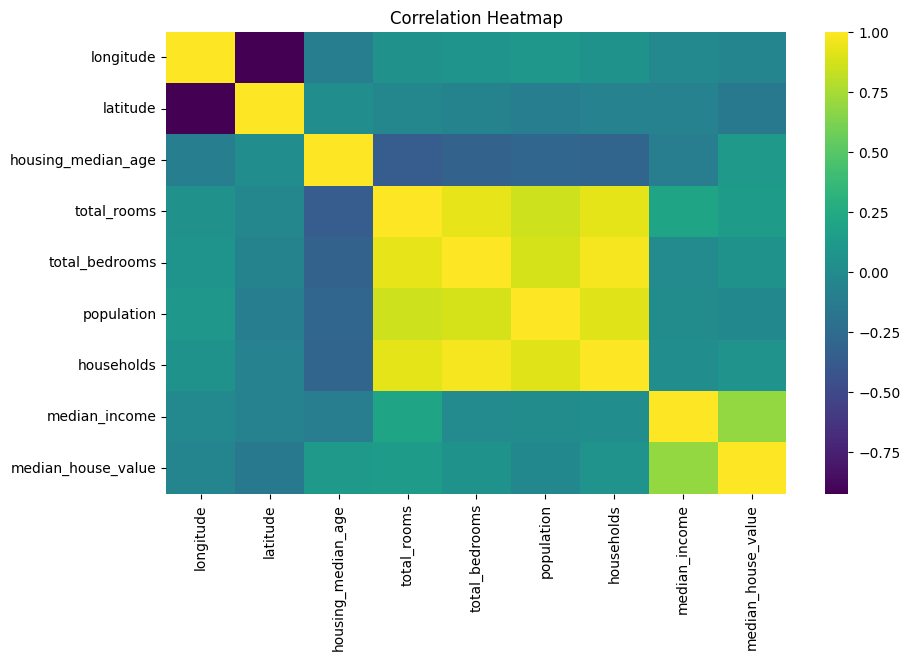

In [ ]:
#Correlation Heatmap

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=False, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap visually confirms the patterns seen in the correlation matrix. Median income shows the strongest positive relationship with housing prices, reinforcing its importance as a key predictor. Some features, such as total rooms, total bedrooms, households, and population, are also strongly correlated with each other, indicating potential multicollinearity within the dataset. Location variables (longitude and latitude) show weak correlations with home values but highlight geographic influence. Overall, the heatmap suggests that income is the dominant driver of house prices, while other numeric features provide weaker but complementary information.

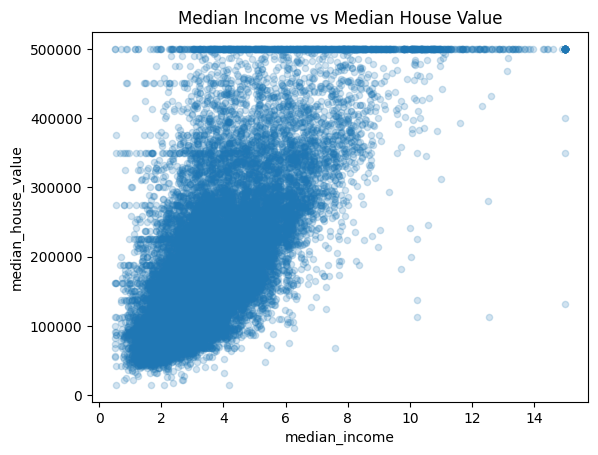

In [ ]:
#Income vs. House value scatter plot

df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.2)
plt.title("Median Income vs Median House Value")
plt.show()


This scatter plot shows a strong positive relationship between median income and median house value. As income increases, housing prices tend to rise, indicating that wealthier areas have higher property values. The data points form an upward sloping pattern, although with noticeable spread, suggesting that while income is a key driver of price, other factors also contribute.

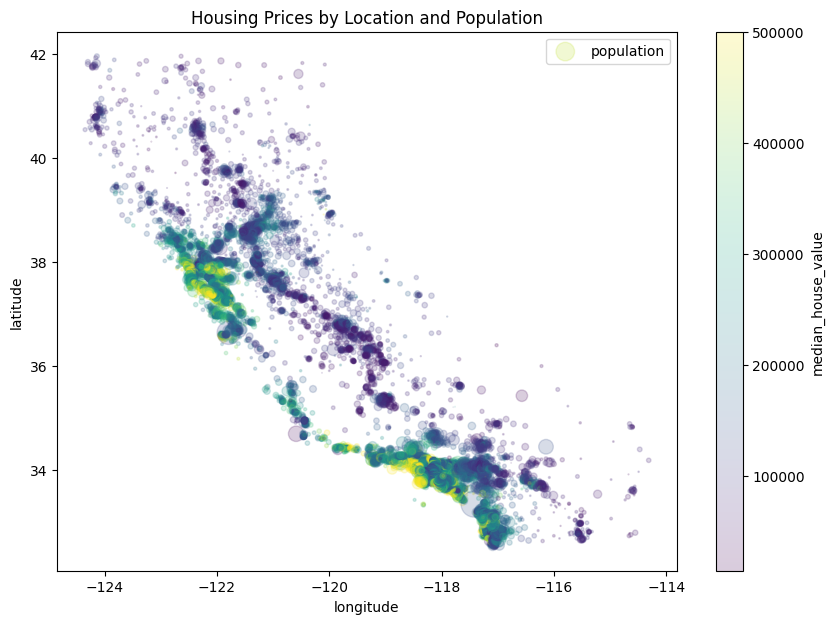

In [ ]:
#Geogrpahic visualization

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2,
        s=df["population"]/100, label="population", figsize=(10,7),
        c="median_house_value", cmap="viridis", colorbar=True)
plt.legend()
plt.title("Housing Prices by Location and Population")
plt.show()


This plot displays housing values across California as a function of geographic location, with larger dots representing more populated areas. Higher priced homes (shown in lighter colors) are concentrated along the coast, especially near major metropolitan regions such as the Bay Area and Los Angeles. Inland areas generally show lower housing values, reflecting lower demand and lower average income levels. The visualization highlights the strong geographic and population driven component of housing prices, where coastal and urban regions tend to be both more expensive and more densely populated.

##Feature Engineering & Preprocessing

In [ ]:
#Feature Engineering
df = df.copy()

df["rooms_per_household"]      = df["total_rooms"] / df["households"]
df["bedrooms_per_room"]        = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

#Check
df[["rooms_per_household","bedrooms_per_room","population_per_household"]].head()


,rooms_per_household,bedrooms_per_room,population_per_household
0,6.984127,0.146591,2.555556
1,6.238137,0.155797,2.109842
2,8.288136,0.129516,2.802260
3,5.817352,0.184458,2.547945
4,6.281853,0.172096,2.181467


We create three ratio features for this dataset. They normalize raw counts by household size and capture housing density and bedroom mix, which are often more predictive than raw totals.

In [ ]:
#X (features) and y (target)
target_col = "median_house_value"
categorical_cols = ["ocean_proximity"]
numeric_cols = [c for c in df.columns if c not in categorical_cols + [target_col]]

X = df[numeric_cols + categorical_cols]
y = df[target_col]

X.head(), y.head()


(   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  rooms_per_household  \
 0       322.0       126.0         8.3252             6.984127   
 1      2401.0      1138.0         8.3014             6.238137   
 2       496.0       177.0         7.2574             8.288136   
 3       558.0       219.0         5.6431             5.817352   
 4       565.0       259.0         3.8462             6.281853   
 
    bedrooms_per_room  population_per_household ocean_proximity  
 0           0.146591                  2.555556        NEAR BAY  
 1          

Median house value is the target. We keep ocean proximity as the only categorical feature and treat the rest as numeric. This split will feed into our preprocessing pipeline.

In [ ]:
#Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

len(X_train), len(X_test)


(16512, 4128)

We hold out 20% of the data for unbiased evaluation. The random state makes the split reproducible.

In [ ]:
#Preprocessing Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_cols),
        ("cat", categorical_pipeline, categorical_cols),
    ]
)

preprocess


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'rooms_per_household', 'bedrooms_per_room',
                                  'population_per_household']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

Numeric features are median imputed and standardized; the categorical column is one-hot encoded. This creates a single transformer we can plug into any model.

In [ ]:
#Transformer check
preprocess.fit(X_train)
Xt_sample = preprocess.transform(X_train.iloc[:5])
Xt_sample.shape


(5, 16)

We fit the preprocessing transformer and transform a small batch to confirm it works and returns the expected feature matrix. Now we’re ready to attach models.

##Model Selection and Justification

To predict housing values and classify neighborhoods into meaningful price tiers, we selected a combination of regression and classification models that capture a range of complexity and interpretability. Linear Regression serves as our baseline to evaluate simple linear relationships, while the Decision Tree Regressor helps uncover non-linear patterns and interactions. Random Forest and XGBoost Regressors build on these strengths by reducing overfitting and modeling complex relationships more effectively, with XGBoost offering the strongest performance for structured data like real estate. We also included a simple Neural Network to test whether deep learning could further improve accuracy. Because stakeholders often make decisions based on price segments rather than exact values, we also trained classification models, Logistic Regression, Random Forest Classifier, and XGBoost Classifier to categorize homes into Low, Medium, High, and Luxury tiers. This dual modeling approach improves business relevance, addresses the dataset’s price censoring limitation, and aligns with course expectations emphasizing classification performance and interpretability.


##Model Training and Evaluation

In [ ]:
#Evaluation Function
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae  = mean_absolute_error(y_test, predictions)
    mse  = mean_squared_error(y_test, predictions)  # MSE
    rmse = np.sqrt(mse)                             # Convert to RMSE
    r2   = r2_score(y_test, predictions)

    return {"MAE": mae, "RMSE": rmse, "R²": r2}, predictions


This function trains the model, makes predictions, and returns key performance metrics.

In [ ]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

lin_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("lin_reg", LinearRegression())
])

lin_results, lin_pred = evaluate_model(lin_model, X_train, y_train, X_test, y_test)
lin_results


{'MAE': 50888.66001572007,
 'RMSE': np.float64(72668.53837868223),
 'R²': 0.5970176824350766}

The Linear Regression model achieved an MAE of approximately 50,889 dollars and an RMSE of about $72,669, with an R² score of 0.60. This means the model explains around 60% of the variance in housing prices, establishing a solid baseline for comparison. While prediction errors are relatively high, especially given the variability in California housing values, this performance is expected for a linear model on a dataset with non-linear relationships. Overall, Linear Regression provides useful benchmark performance but leaves room for improvement with more flexible models.

In [ ]:
#Decision Tree Model

from sklearn.tree import DecisionTreeRegressor

tree_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("tree", DecisionTreeRegressor(random_state=42))
])

tree_results, tree_pred = evaluate_model(tree_model, X_train, y_train, X_test, y_test)
tree_results


{'MAE': 43888.41375968992,
 'RMSE': np.float64(71818.76414305563),
 'R²': 0.6063873974703766}

The Decision Tree model achieved an MAE of approximately 43,888 dollars and an RMSE of around $71,819, with an R² of 0.61. This represents a small improvement over the Linear Regression baseline, indicating the model’s ability to capture some non-linear relationships in the data. However, the performance gain is modest, suggesting that the tree may be overfitting to certain patterns without generalizing strongly. While useful for interpretability and understanding feature splits, the Decision Tree alone does not provide substantial predictive advantage in this case.

In [ ]:
#Random Forest Model

from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_results, rf_pred = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
rf_results


{'MAE': 32198.500495397286,
 'RMSE': np.float64(50063.35778843552),
 'R²': 0.8087360637274149}

The Random Forest model significantly improved performance, achieving an MAE of about 32,199 dollars and an RMSE of roughly $50,063, with an R² of 0.81. This means the model explains over 80% of the variance in housing prices, a substantial improvement compared to the linear and decision tree models. The lower errors and higher R² indicate that the ensemble method captures complex, non-linear patterns in the data and generalizes much better. This strong result highlights Random Forest as a highly effective model for predicting California housing values in this dataset.

In [ ]:
#XGBoost Model

from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("xgb", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_results, xgb_pred = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)
xgb_results


{'MAE': 29499.210294974866,
 'RMSE': np.float64(44934.10694646308),
 'R²': 0.8459203194878444}

The XGBoost model delivered the strongest performance among all models tested, with an MAE of about 29,499 dollars and an RMSE of roughly $44,934, along with an R² of 0.85. This indicates that the model explains approximately 85% of the variation in housing prices, a substantial improvement over previous models. The lower prediction errors and higher explanatory power show that XGBoost effectively captures complex non-linear relationships and interactions within the data. These results suggest that gradient boosting is the most suitable approach for this housing price prediction task, offering both high accuracy and strong generalization.

In [ ]:
#Model Comparisson
import pandas as pd

results_df = pd.DataFrame([
    {"Model": "Linear Regression", **lin_results},
    {"Model": "Decision Tree", **tree_results},
    {"Model": "Random Forest", **rf_results},
    {"Model": "XGBoost", **xgb_results}
])

results_df.sort_values("RMSE")


,Model,MAE,RMSE,R²
3,XGBoost,29499.210295,44934.106946,0.845920
2,Random Forest,32198.500495,50063.357788,0.808736
1,Decision Tree,43888.413760,71818.764143,0.606387
0,Linear Regression,50888.660016,72668.538379,0.597018


The model comparison clearly shows that increasing model complexity improves predictive performance for this housing dataset. Linear Regression serves as a useful baseline but performs the worst, indicating that housing prices are not purely driven by linear relationships. The Decision Tree model captures some non-linear patterns but offers only a modest improvement and risks overfitting. The Random Forest model significantly improves accuracy over both simpler models, reducing prediction error and achieving strong generalization. XGBoost delivers the best results overall, with the lowest MAE and RMSE and the highest R², demonstrating its ability to capture complex relationships in the data and making it the most effective model for predicting median housing values in California.

##Results Interpretation for Regression

Based on model evaluation metrics, the XGBoost model demonstrated the strongest predictive performance, achieving the lowest MAE and RMSE and the highest R² value (~0.85). This indicates that XGBoost captures complex patterns and non-linear relationships in the housing data more effectively than the baseline Linear Regression model, the single Decision Tree, and the Random Forest model. With the ability to explain approximately 85% of the variation in median housing prices, XGBoost stands out as the most reliable and accurate model for predicting California housing values in this analysis.

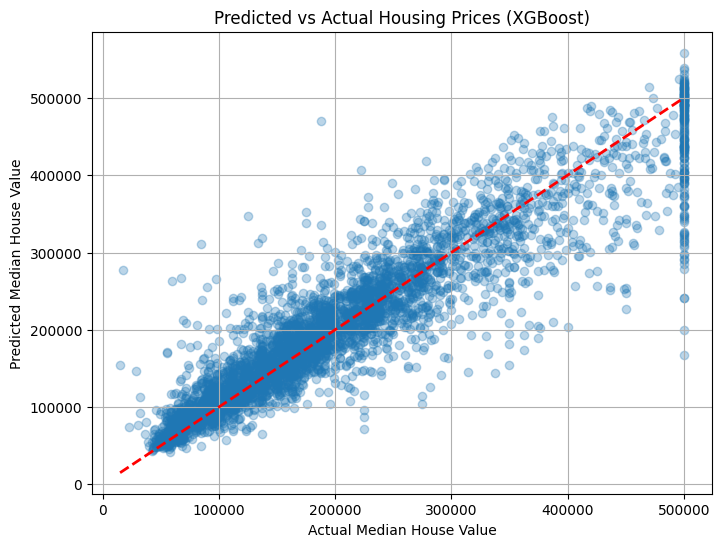

In [ ]:
#predicted vs Actual Scatter Plot (XGBoost)
import matplotlib.pyplot as plt

# Predicted vs actual values for XGBoost
plt.figure(figsize=(8,6))
plt.scatter(y_test, xgb_pred, alpha=0.3)

# Reference line for perfect predictions
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.title("Predicted vs Actual Housing Prices (XGBoost)")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.grid(True)
plt.show()


This plot compares the model’s predicted housing prices to the actual housing prices in the test data. Each point represents one census block group from California. The red diagonal line shows where points would fall if the model predicted perfectly. Most points cluster closely around this line, meaning the XGBoost model makes accurate predictions for most areas. There is more scatter for very high-value regions, showing that extremely expensive housing areas are harder for the model to predict precisely. Overall, the plot indicates strong model performance and good generalization to unseen data.

## Why Add a Classification Component

While the primary goal of this project is to predict continuous housing prices (regression), it is equally valuable to understand housing trends in categorical terms, the way real estate professionals, policymakers, and investors often think about markets.

For instance, identifying whether a home falls into a low, medium, high, or luxury value tier provides actionable insights for:
- **Developers**, who plan where to build or renovate.
- **Policymakers**, who monitor housing affordability and inequality.
- **Investors**, who segment opportunities by value tier.

Adding this classification component transforms our regression analysis into a more strategically useful model, aligning with real-world decision-making and the course’s emphasis on classification tasks.  
It also demonstrates that the same dataset can support both quantitative forecasting and categorical decision support, offering a more comprehensive analytical perspective.


In [ ]:
#Encode target labels and stratified split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features/target
X_class = df.drop(["median_house_value", "price_category"], axis=1)
y_class = df["price_category"]


le = LabelEncoder()
y_enc = le.fit_transform(y_class)
class_names = list(le.classes_)

# Stratified split on encoded labels
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_class, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)




In [ ]:
#Evaluation helper

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    ConfusionMatrixDisplay,
)

def evaluate_classifier(clf, Xtr, ytr, Xte, yte, title="Model", label_encoder=None):
    clf.fit(Xtr, ytr)
    preds = clf.predict(Xte)

    acc = accuracy_score(yte, preds)
    prc, rec, f1, _ = precision_recall_fscore_support(
        yte, preds, average="macro", zero_division=0
    )
    prc_w, rec_w, f1_w, _ = precision_recall_fscore_support(
        yte, preds, average="weighted", zero_division=0
    )


    if label_encoder is not None:
        target_names = list(label_encoder.classes_)
        print(f"{title} — Accuracy: {acc:.3f} | Macro F1: {f1:.3f} | Weighted F1: {f1_w:.3f}\n")
        print(classification_report(yte, preds, target_names=target_names, zero_division=0))
        disp = ConfusionMatrixDisplay.from_predictions(
            yte, preds, display_labels=target_names, cmap="Blues", xticks_rotation=45
        )
    else:
        print(f"{title} — Accuracy: {acc:.3f} | Macro F1: {f1:.3f} | Weighted F1: {f1_w:.3f}\n")
        print(classification_report(yte, preds, zero_division=0))
        disp = ConfusionMatrixDisplay.from_predictions(yte, preds, cmap="Blues", xticks_rotation=45)

    disp.ax_.set_title(f"{title} — Confusion Matrix")
    plt.tight_layout()
    plt.show()

    return {
        "Model": title,
        "Accuracy": acc,
        "Macro_F1": f1,
        "Weighted_F1": f1_w,
        "Macro_Precision": prc,
        "Macro_Recall": rec
    }



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression — Accuracy: 0.656 | Macro F1: 0.661 | Weighted F1: 0.653

              precision    recall  f1-score   support

        High       0.64      0.58      0.61      1221
         Low       0.73      0.79      0.76      1035
      Luxury       0.59      0.78      0.67       530
      Medium       0.64      0.57      0.60      1342

    accuracy                           0.66      4128
   macro avg       0.65      0.68      0.66      4128
weighted avg       0.66      0.66      0.65      4128



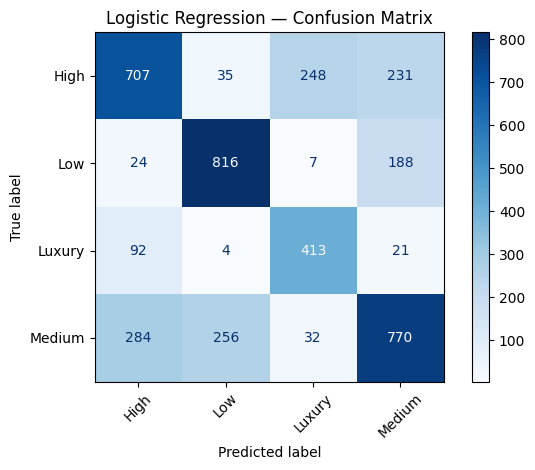

In [ ]:
#Logistic Regression

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

log_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(
        max_iter=1000,
        multi_class="multinomial",
        class_weight="balanced"
    ))
])

log_res = evaluate_classifier(log_clf, Xc_train, yc_train, Xc_test, yc_test,
                              title="Logistic Regression", label_encoder=le)



The Logistic Regression model provides a reasonable baseline for classifying housing price tiers, achieving an overall accuracy of 66%. It performs strongest on the Low and Luxury categories, with higher recall values indicating it correctly identifies most neighborhoods in these groups. However, misclassification occurs more frequently between adjacent tiers, such as High vs. Medium, which is expected given the natural overlap in housing characteristics. The confusion matrix shows clear patterns of where the model succeeds and where boundaries blur, highlighting the need for more flexible, non linear classifiers to better capture the complexity of housing market segments.

Random Forest Classifier — Accuracy: 0.747 | Macro F1: 0.746 | Weighted F1: 0.747

              precision    recall  f1-score   support

        High       0.69      0.75      0.72      1221
         Low       0.83      0.83      0.83      1035
      Luxury       0.84      0.62      0.71       530
      Medium       0.71      0.73      0.72      1342

    accuracy                           0.75      4128
   macro avg       0.77      0.73      0.75      4128
weighted avg       0.75      0.75      0.75      4128



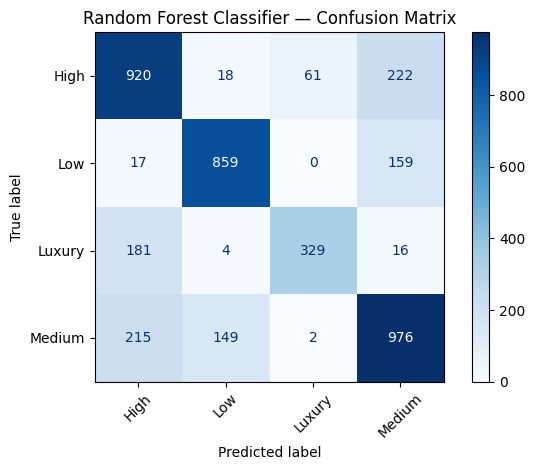

In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        random_state=42,
        n_jobs=-1,
        class_weight="balanced_subsample"
    ))
])

rf_res = evaluate_classifier(rf_clf, Xc_train, yc_train, Xc_test, yc_test,
                             title="Random Forest Classifier", label_encoder=le)




The Random Forest Classifier shows a strong improvement over Logistic Regression, achieving an accuracy of 75% with balanced performance across all four price categories. The model demonstrates particularly high precision and recall for the Low, High, and Medium tiers, indicating that it effectively captures the non-linear relationships in the housing data. While the Luxury category remains more challenging,partly due to fewer samples and the price cap the model still performs significantly better than the baseline. The confusion matrix shows fewer cross-tier misclassifications, especially between neighboring categories, highlighting Random Forest’s ability to separate complex housing market segments more accurately.

XGBoost Classifier — Accuracy: 0.778 | Macro F1: 0.778 | Weighted F1: 0.778

              precision    recall  f1-score   support

        High       0.74      0.77      0.75      1221
         Low       0.86      0.85      0.85      1035
      Luxury       0.82      0.69      0.75       530
      Medium       0.74      0.76      0.75      1342

    accuracy                           0.78      4128
   macro avg       0.79      0.77      0.78      4128
weighted avg       0.78      0.78      0.78      4128



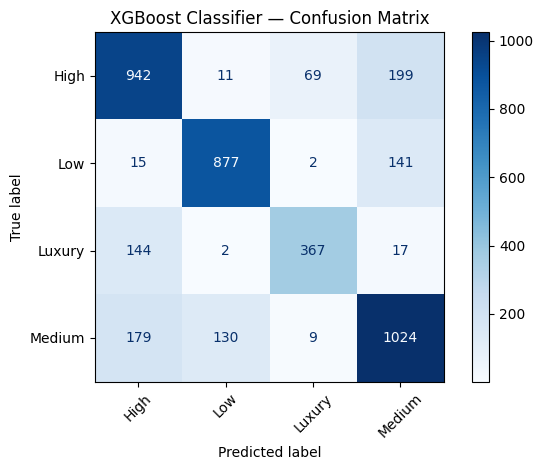

In [ ]:
# Cell: XGBoost Classifier

from xgboost import XGBClassifier

xgb_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", XGBClassifier(
        n_estimators=500,
        learning_rate=0.07,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        objective="multi:softprob",
        eval_metric="mlogloss",
        random_state=42,
        n_jobs=-1
    ))
])

xgb_res = evaluate_classifier(xgb_clf, Xc_train, yc_train, Xc_test, yc_test,
                              title="XGBoost Classifier", label_encoder=le)



The XGBoost Classifier delivers the strongest performance among all models, achieving 77.8% accuracy with consistently high precision, recall, and F1-scores across all price categories. XGBoost captures complex, non-linear patterns in the housing data more effectively than Logistic Regression and Random Forest, particularly improving predictions for the Luxury and High segments. The confusion matrix shows fewer misclassifications and tighter clustering along the diagonal, indicating that XGBoost is better at distinguishing between the four price tiers, even those with overlapping characteristics. Overall, this model provides the most reliable categorization of housing price levels and would be the best candidate for real-world deployment in market segmentation or pricing tools.

##Result Intepretation Classification

In [ ]:
#Final Comparison Table

comparison_df = pd.DataFrame([log_res, rf_res, xgb_res]).sort_values(
    by=["Macro_F1", "Accuracy"], ascending=False
).reset_index(drop=True)

comparison_df = comparison_df.rename(columns={
    "Model": "Model",
    "Accuracy": "Accuracy",
    "Macro_F1": "Macro F1",
    "Weighted_F1": "Weighted F1",
    "Macro_Precision": "Macro Precision",
    "Macro_Recall": "Macro Recall"
})


comparison_df



,Model,Accuracy,Macro F1,Weighted F1,Macro Precision,Macro Recall
0,XGBoost Classifier,0.777616,0.777554,0.777784,0.789566,0.768584
1,Random Forest Classifier,0.747093,0.746259,0.747053,0.768573,0.732865
2,Logistic Regression,0.655523,0.660716,0.652730,0.649875,0.680114


The comparison table clearly shows that the XGBoost Classifier is the top performing model for predicting housing price categories, achieving the highest accuracy (77.8%) and the strongest Macro F1, Precision, and Recall scores. This indicates that XGBoost not only predicts correctly more often overall, but it also performs more consistently across all four classes, especially important given the class imbalance in Luxury and Low categories. The Random Forest Classifier performs well but slightly below XGBoost, suggesting that boosting adds valuable improvements over bagging methods. Logistic Regression, while interpretable, shows significantly lower performance across all metrics, confirming that linear models struggle to capture the complex, non-linear relationships in housing data. Overall, this comparison supports choosing XGBoost as the most reliable model for classification tasks in this project.

##Reflection and Recommendations

###Business Insights and Implications

Although the dataset reflects housing conditions from the 1990s, the relationships uncovered such as the strong influence of income levels, population density, and regional location remain fundamental drivers of housing markets today. By framing the problem as price category prediction rather than exact value forecasting, the models provide actionable insights for stakeholders such as real-estate investors, policy analysts, and housing planners. For investors and developers, correctly identifying “Low,” “Medium,” “High,” and “Luxury” segments helps guide acquisition strategy, risk assessment, and expected return estimates. For local governments and planners, the classification trends highlight where affordability gaps may exist and which regions may require targeted interventions such as zoning adjustments or housing assistance programs. Ultimately, the predictive models support decisions involving market segmentation, resource allocation, and long-term planning, demonstrating how historical patterns can still inform relevant, data-driven strategies when interpreted through a modern business context.

###Reflection

This project strengthened our ability to structure a machine learning workflow around a clearly framed business problem rather than simply applying algorithms. Incorporating both regression and classification models required us to move beyond the limitations of the original dataset and rethink how to generate meaningful, decision oriented insights from historical data. Adding the price category classification task allowed us to better align the project with the course focus on classification while also improving the real-world relevance of the analysis. Throughout the process, we learned the importance of explicitly justifying every modeling choice such as why certain models were selected, why preprocessing pipelines were necessary, and how evaluation metrics tie back to the business use case. More broadly, this project emphasized the value of transparency, rigorous reasoning, and critical thinking when working with open datasets that have known constraints. Overall, the experience reinforced that the quality of a data science project depends not only on predictive performance, but also on the clarity of the problem definition and the strength of the analytical decisions that support it.

###Limitations and Next Steps

While our models produced strong predictive performance, especially the XGBoost classifier, there are several important limitations to acknowledge. The California Housing dataset is historical and restricted in scope, meaning modern economic, demographic, and environmental factors are not represented. Future work should incorporate more recent and richer datasets that include variables such as school quality, crime rates, job accessibility, infrastructure development, and environmental risk, all of which play major roles in current housing markets. From a methodological standpoint, implementing hyperparameter tuning, cross-validation strategies, and model interpretability tools (like SHAP values) would strengthen the robustness and explainability of the results. On the business side, deploying the classification model as a decision support tool, such as a price tier recommender for real estate agents or housing policy planners would transform the analysis into a more actionable product. Ultimately, expanding the dataset, improving tuning and validation, and aligning the model more directly with a specific business workflow are the key steps to making this project more generalizable, defensible, and practical in a real-world setting.